In [18]:
import numpy as np
from trainer import Predictions
from data.xray import create_xray_dataset
from eval import Metric
from nn import xray_classnames
from test import probs_to_mask, pred_to_probs, probs_to_confidence
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
data_root = '/media/data/jinnan2/jinnan2_round2_train_20190401'
data_fold = 0
dataset = create_xray_dataset(data_root, 'test', data_fold)

loading annotations into memory...
Done (t=0.15s)
creating index...
index created!


In [3]:
predictions = Predictions.open('/home/xu/Downloads/test_fold0_ensembled_4337/detections.pkl')

In [49]:
iou_a = []
confidence_a = []
for i, sample in enumerate(dataset):
    image_id = sample['image_id']
    pred = predictions[image_id]
    probs = pred_to_probs(pred)
    masks = probs_to_mask(probs)
    confidence = 1 - ( (1 - probs_to_confidence(probs)) ** 2).mean() ** 0.5
    
    metric = Metric(xray_classnames)
    metric.update(masks, sample['masks'])
    iou = metric.iou()
    iou = iou[~np.isnan(iou)]
    iou = iou.mean() if iou.size else 1
    #print(iou, confidence)
    iou_a.append(iou)
    confidence_a.append(confidence)
    if iou < 0.1:
        print(i, image_id, iou)


/home/xu/projects/xray/code/unet/eval.py:30: RuntimeWarning: invalid value encountered in true_divide
  return self.inter / self.union


0 1276.jpg 0.0
67 1085.jpg 0.0
110 2277.jpg 0.0
315 1163.jpg 0.0
464 457 0.0631163708086785
682 1925 0.0


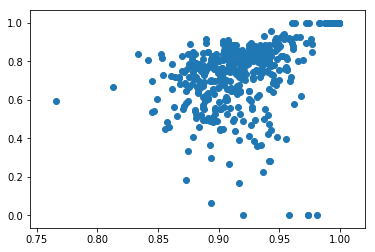

In [43]:
plt.scatter(confidence_a, iou_a)

In [46]:
confidence_a = np.asarray(confidence_a)
confidence_h = confidence_a > 0.9
print(np.count_nonzero(confidence_h), len(confidence_h))

679 810


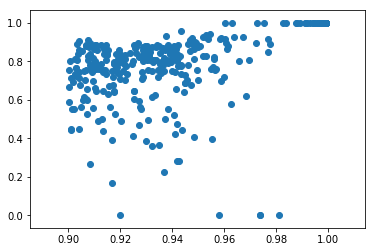

In [47]:
iou_a = np.asarray(iou_a)
iou_h = iou_a[confidence_h]
plt.scatter(confidence_a[confidence_h], iou_h)